In [2]:
import cv2
import numpy as np
import sys
import glob
import math
import time
import os
from skimage import measure
from skimage.io import imread
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

In [16]:
car_image = cv2.imread("frame1475.jpg")
# it should be a 2 dimensional array
print(car_image.shape)

(720, 1280, 3)


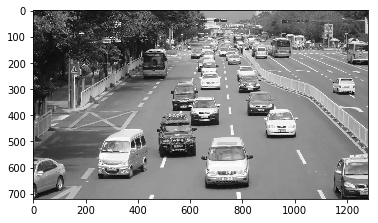

In [17]:
#car_image=cv2.convertScaleAbs(car_image)
img_gray = cv2.cvtColor(car_image,cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

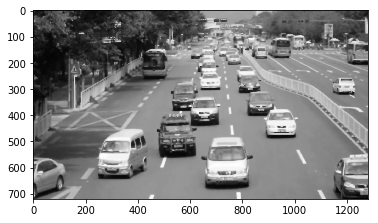

In [18]:
noise_removal = cv2.bilateralFilter(img_gray,9,75,75)
plt.imshow(noise_removal, cmap="gray")

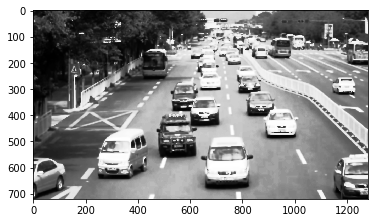

In [19]:
equal_histogram = cv2.equalizeHist(noise_removal)
plt.imshow(equal_histogram, cmap="gray")

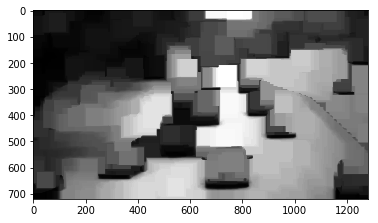

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=15)
plt.imshow(morph_image, cmap="gray")

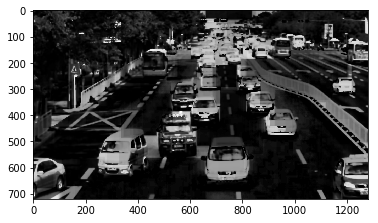

In [21]:
sub_morph_image = cv2.subtract(equal_histogram,morph_image)
plt.imshow(sub_morph_image, cmap="gray")

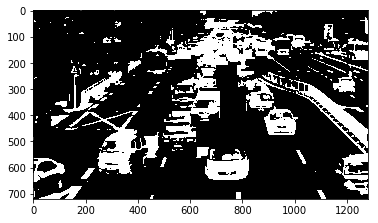

In [22]:
ret,thresh_image = cv2.threshold(sub_morph_image,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh_image, cmap="gray")

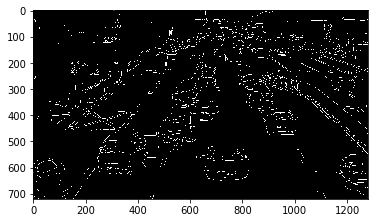

In [23]:
canny_image = cv2.Canny(thresh_image,250,255)
plt.imshow(canny_image, cmap="gray")

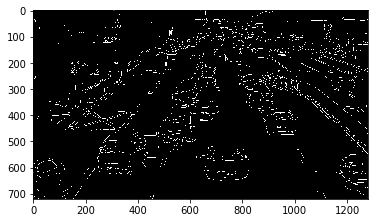

In [24]:
canny_image = cv2.convertScaleAbs(canny_image)

# dilation to strengthen the edges
kernel = np.ones((3,3), np.uint8)
# Creating the kernel for dilation
#dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
dilated_image=canny_image
plt.imshow(dilated_image, cmap="gray")

In [25]:
new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None
# loop over our contours
for c in contours:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.06 * peri, True)  # Approximating with 6% error
	# if our approximated contour has four points, then
	# we can assume that we have found our screen
	if len(approx) == 4:  # Select the contour with 4 corners
		screenCnt = approx
		break

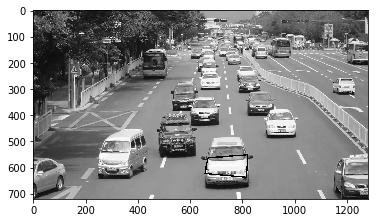

In [26]:
final=cv2.drawContours(img_gray, [screenCnt], -1, (0,255,0), 3)
plt.imshow(final, cmap="gray")

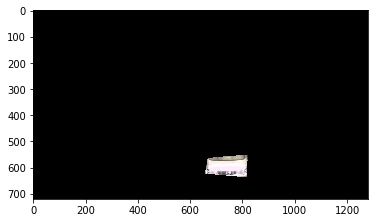

In [27]:
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(car_image,car_image,mask=mask)
plt.imshow(new_image, cmap="gray")

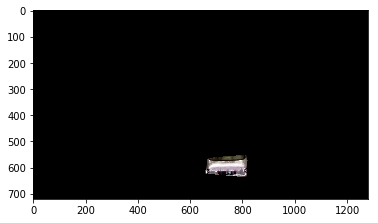

In [28]:
y,cr,cb = cv2.split(cv2.cvtColor(new_image,cv2.COLOR_RGB2YCrCb))
y = cv2.equalizeHist(y)
# Applying histogram equalisation
final_image = cv2.cvtColor(cv2.merge([y,cr,cb]),cv2.COLOR_YCrCb2RGB)
plt.imshow(final_image, cmap="gray")